# Magnet Ramp 02-24-2021

## Python Scripts

In [1]:
# process and generate plots
from plot_slow_controls import *

ModuleNotFoundError: No module named 'plot_slow_controls'

mean(I) = 8.702E-04
[[Model]]
    Model(lin)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 357
    # variables        = 2
    chi-square         = 3.570e-248
    reduced chi-square = 0.00000000
    Akaike info crit   = -205501.720
    Bayesian info crit = -205493.964
##  Warning: uncertainties could not be estimated:
[[Variables]]
    b:  0.00000000 +/- 0.00000000 (nan%) (init = 0)
    m:  0.00000000 +/- 0.00000000 (nan%) (init = 0)
m / b =  NAN
m / I =  0.000E+00


/home/ckampa/anaconda3/envs/mu2e/lib/python3.8/site-packages/lmfit/printfuncs.py:180: RuntimeWarning: invalid value encountered in double_scalars
  spercent = '({:.2%})'.format(abs(par.stderr/par.value))
/home/ckampa/coding/hallprobecalib/scripts/magnet_ramp_Feb_2021/slow_temp_regress.py:102: RuntimeWarning: invalid value encountered in double_scalars
  print(f'm / b = {result2.params["m"].value / result2.params["b"].value : 0.3E}')


AttributeError: 'float' object has no attribute 'shape'

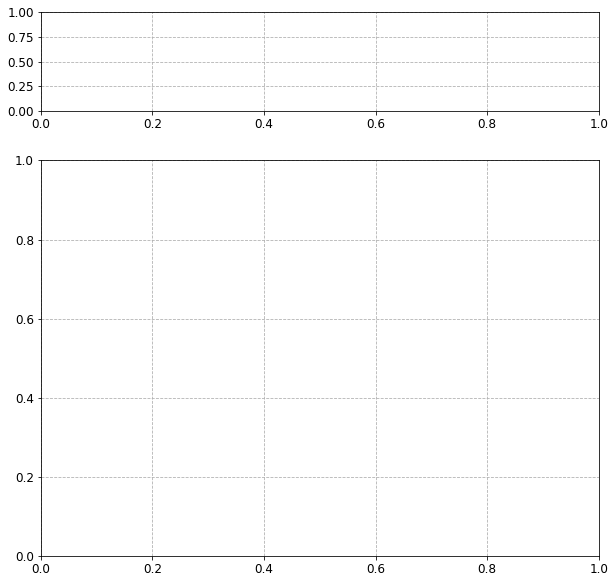

In [3]:
# analyze data
from slow_temp_regress import *

## Setup

In [5]:
df = pd.read_pickle(ddir+'ramp_2021-02-24_processed.pkl')

In [6]:
df

,Time,Magnet Current [A],Magnet Voltage [V],Coil 1 (new),Coil 2 (old),LCW in Coil1,LCW out Coil 1,LCW in Coil 2,LCW out Coil 2,Yoke,...,SmarAct_Meas_Rotation_Angle_1,SmarAct_Meas_Angle_2,SmarAct_Meas_Rotation_Angle_2,seconds_delta,hours_delta,days_delta,DF0000000D5E803A_Cal_Bmag,C90000000D53983A_Cal_Bmag,C50000000D5E473A_Cal_Bmag,6A0000000D61333A_Cal_Bmag
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-03-01 09:51:43,3/1/2021 9:51:43 AM,0.000672,0.001643,8.435831,8.354500,6.909949,7.484150,8.040173,7.108479,15.836957,...,0.0,0.001119,0.0,432021.0,120.005833,5.000243,0.000474,0.000116,0.000127,0.000927
2021-03-01 09:52:43,3/1/2021 9:52:43 AM,0.000700,0.000691,8.337690,8.323365,6.913098,7.457797,8.036749,7.106894,15.808518,...,0.0,0.001115,0.0,432081.0,120.022500,5.000938,0.000450,0.000108,0.000121,0.000898
2021-03-01 09:53:43,3/1/2021 9:53:43 AM,0.000703,0.001220,8.288239,8.268475,6.896706,7.444767,7.997497,7.073971,15.785650,...,0.0,0.001119,0.0,432141.0,120.039167,5.001632,0.000497,0.000118,0.000132,0.000933
2021-03-01 09:54:43,3/1/2021 9:54:43 AM,0.000727,0.001281,8.240237,8.222038,6.878652,7.405972,7.997888,7.039308,15.758918,...,0.0,0.001119,0.0,432201.0,120.055833,5.002326,0.000444,0.000118,0.000142,0.000902
2021-03-01 09:55:43,3/1/2021 9:55:43 AM,0.000547,0.001102,8.167383,8.192588,6.912902,7.430858,8.020038,7.067418,15.736776,...,0.0,0.001119,0.0,432261.0,120.072500,5.003021,0.000475,0.000093,0.000124,0.000915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-11 17:46:47,3/11/2021 5:46:47 PM,281.677420,36.814150,51.974365,51.455513,16.494814,22.697769,23.309382,31.614250,25.736761,...,0.0,0.001049,0.0,1324525.0,367.923611,15.330150,0.724450,0.002921,0.020067,1.306971
2021-03-11 17:47:47,3/11/2021 5:47:47 PM,281.677477,36.814183,51.953983,51.460171,16.498129,22.703094,23.390150,31.622131,25.739260,...,0.0,0.001047,0.0,1324585.0,367.940278,15.330845,0.724439,0.002959,0.020051,1.306981
2021-03-11 17:48:47,3/11/2021 5:48:47 PM,281.677647,36.814433,51.900555,51.444550,16.515627,22.720036,23.383900,31.625975,25.749882,...,0.0,0.001051,0.0,1324645.0,367.956944,15.331539,0.724415,0.002932,0.020051,1.306977


## Data Processing

The following processing cuts / steps are applied:
- f

See below a comparison of $B$ vs. $I$ before and after processing.

### Before

### After

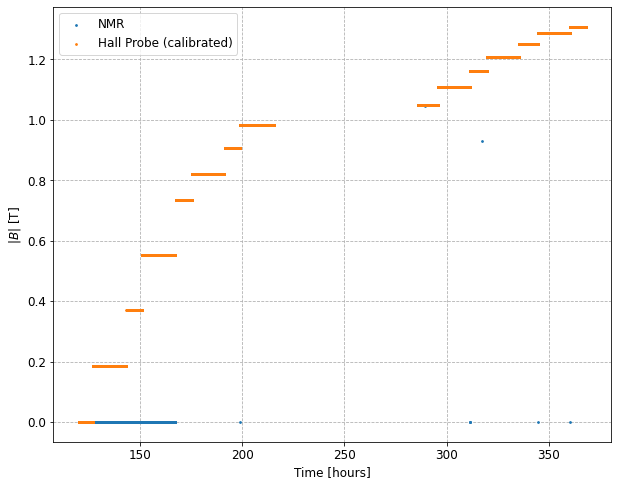

In [4]:
fig1

## Results

### Modeling $B$ vs. $I$

#### Interpolation

#### Polynomial Model

### $B$ Location Dependence

### Finite Element Comparison

To compare to some expectation, a 2D-axisymmetric finite element method was employed. The magnet modeling can be found at https://github.com/FMS-Mu2e/CalibMagnetCalc. This utilizes the Finite Element Method Magnetics (FEMM) software and is a reasonable approximation of the calibration magnet, except for the yoke, which is not axisymmetric.

## Conclusions / Next Steps

Given the planned reliance on the NMR measurement of $|B|$ as an indicator of $|B|$ at the location of the Hall probe, there is a serious need to resolve the 